In [209]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools


### Matplotlib 한글폰트 사용하기
- matplotlib.font_manager

In [50]:
import matplotlib.font_manager as fm

font_location = "/usr/share/fonts/truetype/unfonts-core/UnDotumBold.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

### Numpy array
- rand(100) : 0~1 사이의 random number를 100개 생성하고
- astype : numpy array를 int로 변환

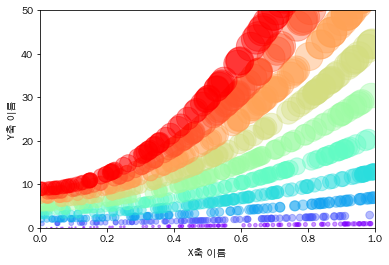

In [52]:
xs = []
ys = []

for i in range(10):
    x = np.random.rand(100)
    xs.append(x) # .astype(int)
    ys.append(i + x + (i*x)**2)
    
colors = cm.rainbow(np.linspace(0, 1, 10))
#colors = itertools.cycle(["r", "b", "g"])
for x, y, c in zip(xs, ys, colors):
    plt.scatter(x, y, color=c, alpha=0.4, s=y*20, marker='o')
   
plt.xlim(0, 1); plt.ylim(0, 50)
plt.xlabel('X축 이름'); plt.ylabel('Y축 이름')
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

/home/bogard75/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/bogard75/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


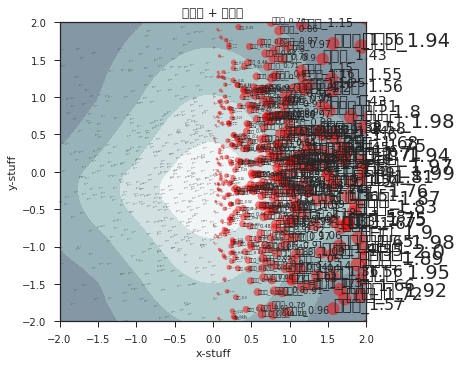

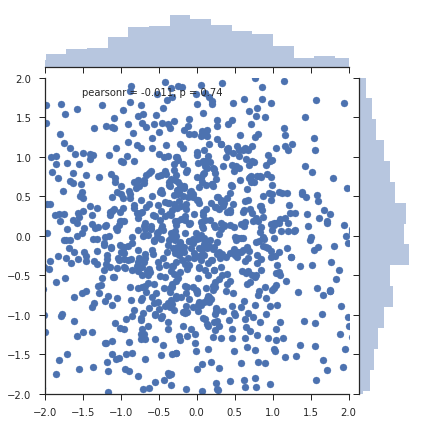

In [51]:
# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

fig = plt.figure(1, figsize=(5.5,5.5))

X, Y = meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1.0, 1.0)
Z = 10 * (Z1 - Z2)

CS = contourf(x, y, Z, 10, cmap=cm.bone, origin='lower')

# the scatter plot:
ax_sct = plt.subplot(111)
ax_sct.scatter(x, y, alpha=0.5, color='r', s=x*100, cmap=cm.bone)

for i, txt in enumerate(x):
    txt = '포인트_' + x[i].round(2).astype(str)
    ax_sct.annotate(txt, (x[i], y[i]), fontsize= x[i]*10)

title('컨투어 + 스캐터')
xlabel('x-stuff')
ylabel('y-stuff')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.show()


AttributeError: Unknown property annotate

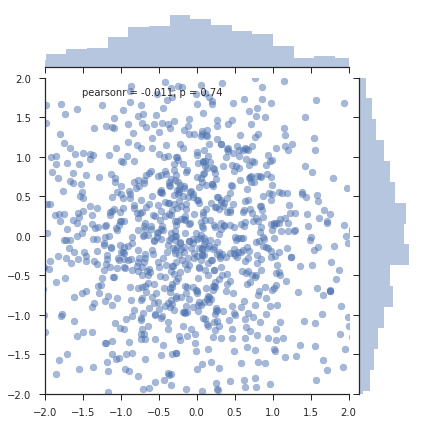

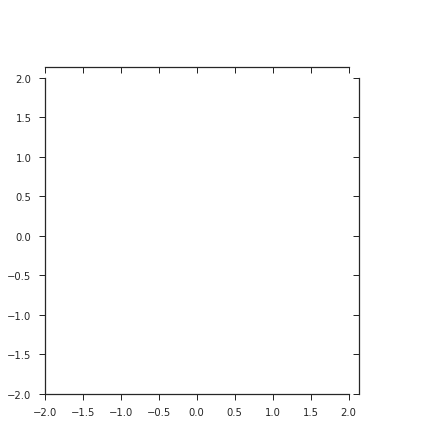

In [68]:
sns.jointplot(x, y, kind='scatter', alpha=0.5, xlim=(-2,2), ylim=(-2,2))
sns.jointplot(x, y, kind='scatter', xlim=(-2,2), ylim=(-2,2), annotate=)


### Yahoo 파이낸스 자료 입수
- sudo pip install yahoo_finance

In [15]:
from pandas_datareader import data
data.DataReader('005930.KS','yahoo','2016-07-04','2016-07-08')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-04,1464000.0,1474000.0,1451000.0,1466000.0,1430644.125,159900
2016-07-05,1466000.0,1475000.0,1462000.0,1469000.0,1433571.875,157407
2016-07-06,1447000.0,1452000.0,1412000.0,1421000.0,1386729.375,334983
2016-07-07,1421000.0,1450000.0,1416000.0,1450000.0,1415030.000,229904
2016-07-08,1450000.0,1475000.0,1449000.0,1460000.0,1424788.750,269963


### KRX에서 종목코드 바로 받기
- https://minjejeon.github.io/learningstock/2017/09/07/download-krx-ticker-symbols-at-once.html

In [104]:
import pandas as pd

df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]


In [110]:
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역,상장년월
0,BYC,001460,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,유 중 화,http://www.byc.co.kr,서울특별시,197506
1,CJ CGV,079160,"영화, 비디오물, 방송프로그램 제작 및 배급업","영화상영,영화관 운영",2004-12-24,12월,서 정,http://www.cgv.co.kr,서울특별시,200412
2,CJ씨푸드,011150,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입",1988-11-26,12월,"유병철, 강신호(각자대표)",http://www.cjseafood.net,경기도,198811
3,CJ제일제당,097950,기타 식품 제조업,"설탕,소맥분,조미식품,육가공식품(돈육,돼지비계,돼지식용설육),대두가공식품,사료,의약...",2007-09-28,12월,"손경식, 김철하, 신현재 (각자 대표이사)",http://www.cj.co.kr,서울특별시,200709
4,DB손해보험,005830,보험업,"자동차보험,화재보험,해상보험,특종보험,장기보험",1973-06-28,12월,김정남,http://www.idbins.com,서울특별시,197306


In [106]:
import datetime, calendar

In [107]:
df.종목코드 = df.종목코드.map('{:06d}'.format)   # 종목코드 여섯자리
df.상장일 = df.상장일.apply(lambda x: datetime.datetime(*[int(i) for i in x.split('-')]))

In [121]:
df= df.assign(상장년월=df.상장일.apply(lambda x: x.strftime("%Y%m")))
df= df.assign(상장년도=df.상장일.apply(lambda x: x.strftime("%Y")))

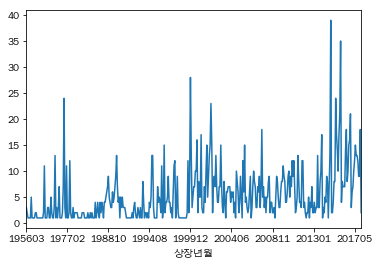

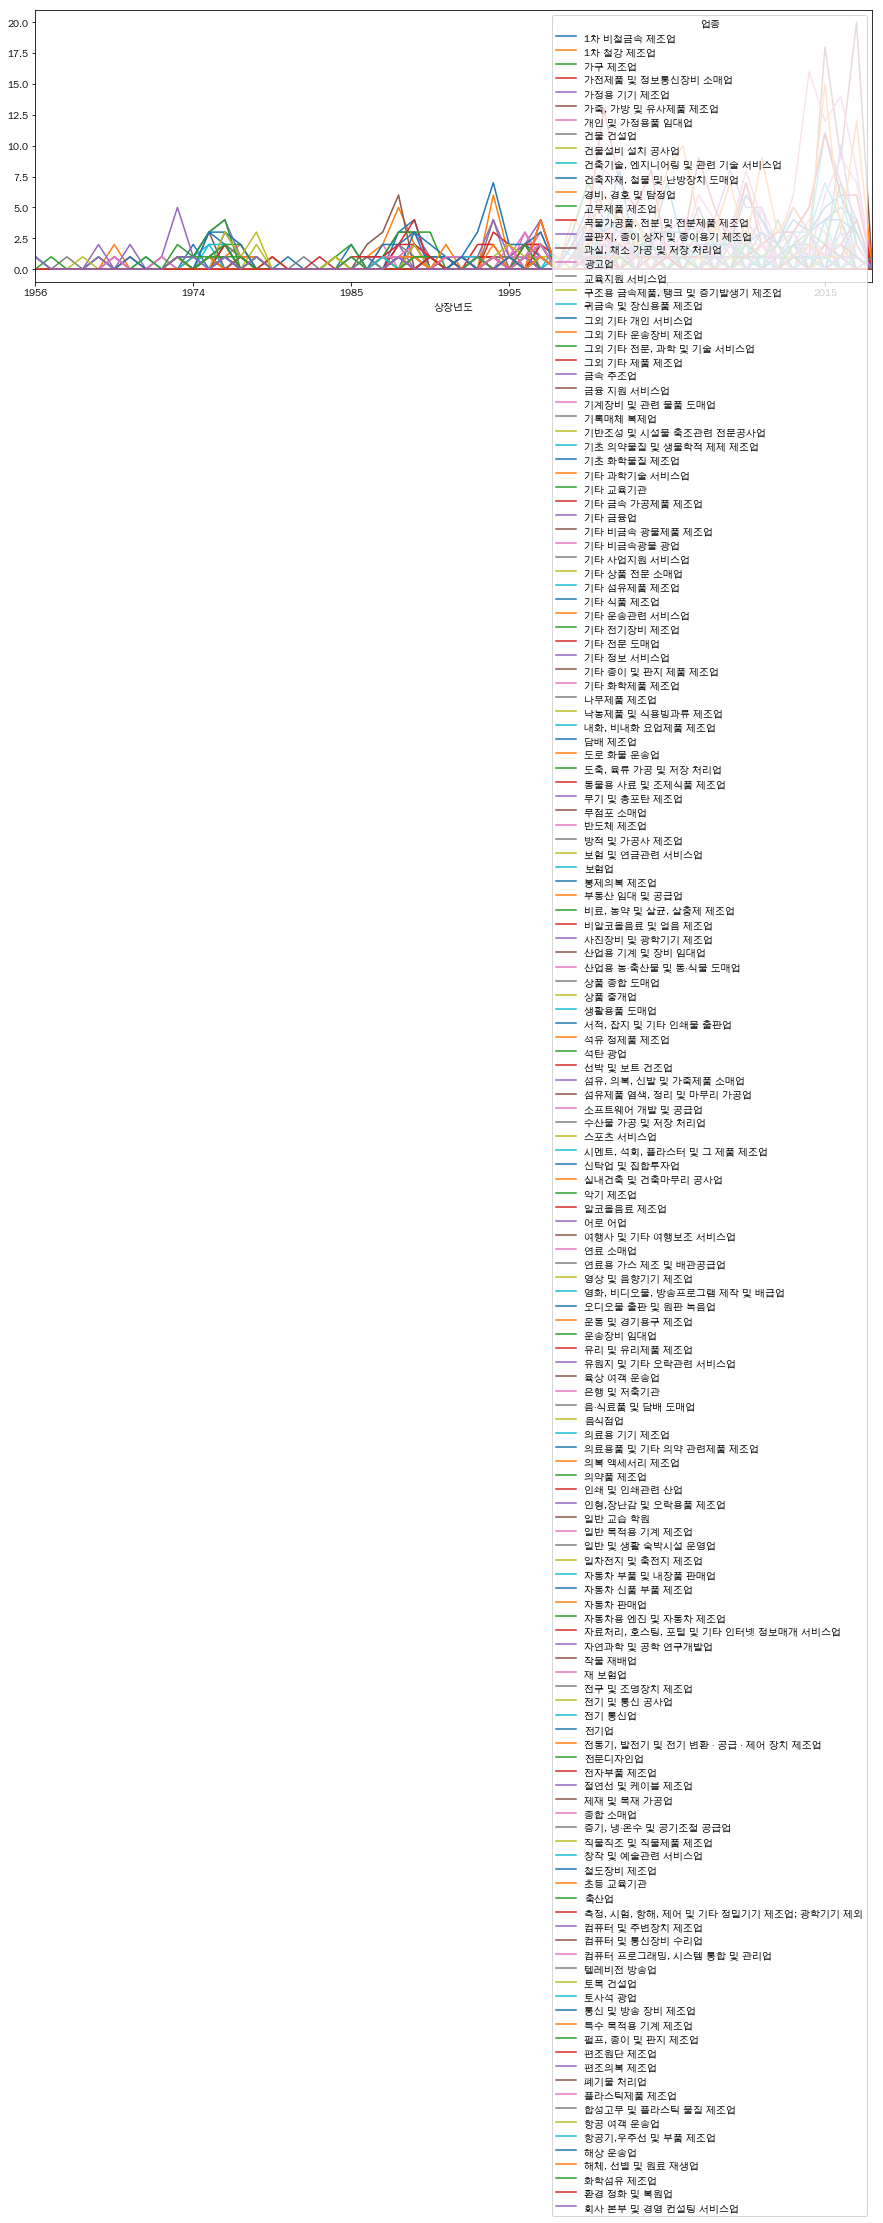

In [129]:
%matplotlib inline
df.groupby('상장년월').size().plot()
show()
df.groupby('업종').size()

pd.crosstab(df.상장년도, df.업종).plot(figsize=(15,5))


In [16]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns
sns.set(style='ticks')

In [28]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size = 1000)
y = -.5 * x + rs.normal(size=1000)

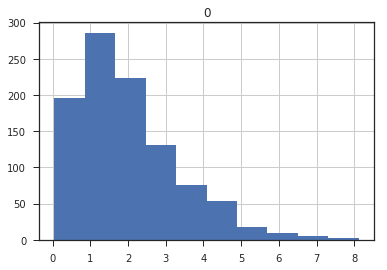

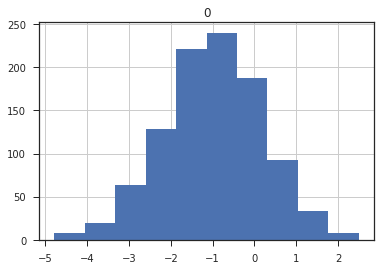

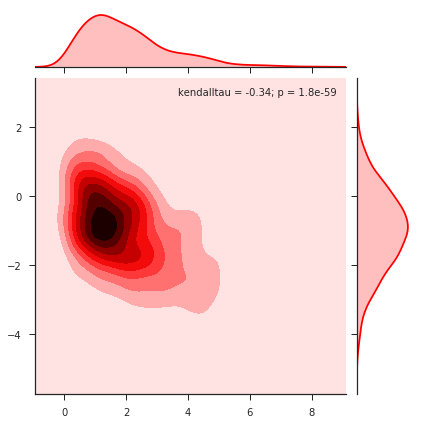

In [43]:
%matplotlib inline
pd.DataFrame(x).hist()
pd.DataFrame(y).hist()

sns.jointplot(x, y, kind='kde', stat_func=kendalltau, color='#FF0000')

In [9]:
print(rs)

Text(0.5,0.5,'Satt\nMean')

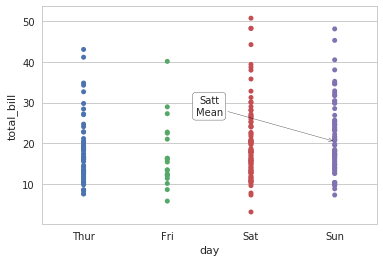

In [97]:
import seaborn as sns

sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
sat_mean = tips.loc[tips['day'] == 'Sat']['total_bill'].mean()

ax = sns.stripplot(x="day", y="total_bill", data=tips)
ax.annotate("Satt\nMean",
            xy=(3, sat_mean), 
#            xycoords='data',
            xytext=(0.5, .5), 
            textcoords='axes fraction',
            horizontalalignment="center",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", fc="w"),
            )

In [181]:
tips = sns.load_dataset("tips")

In [182]:
#tips.smoker = tips.smoker.apply(YN_to_num)
tips.describe()
tips['smoker'].replace(['Yes', 'No'], [1, 0], inplace=True)
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


/home/bogard75/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fc89e3908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6fc86eae80>]], dtype=object)

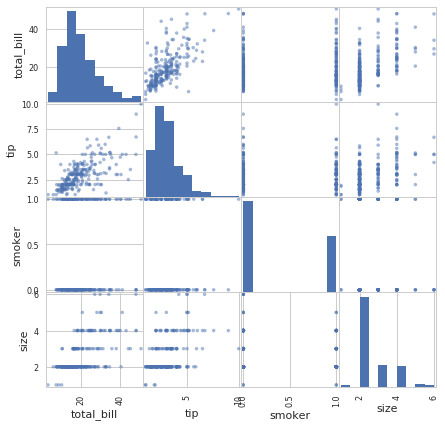

In [183]:

pd.scatter_matrix(tips, figsize=(7,7))


In [159]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


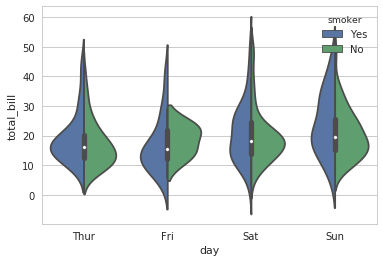

In [124]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", split=True)